## Import library

In [1]:
%matplotlib inline
from pathlib import Path
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [2]:
## DELETE ::
##   out2020-01-31_13-10-13 
##   out2020-02-14_13-13-49 (lack data)
##   out2020-02-10_09-20-04 (lack data)

## 讀Feature資料

In [3]:
# Path
TIMESTAMP_PATH = Path("C:/Lab/auo_lab_experiment/timestamp")
LABEL_PATH = Path("C:/Lab/auo_lab_experiment/label/csv")
MISSINGDATA = Path("C:/Lab/auo_lab_experiment/label/disapear_list")
df = pd.read_csv("C:/Lab/auo_lab_experiment/feature_data/feature_data.csv")
missing_list = []
for x in MISSINGDATA.read_text().splitlines():
    missing_list.append(x)
missing_list

['out2020-02-12_14-28-34',
 'out2020-02-12_14-07-25',
 'out2020-02-06_08-52-09',
 'out2020-02-06_09-13-11',
 'out2020-02-13_14-41-37',
 'out2020-02-13_15-01-38',
 'out2020-02-11_16-12-39',
 'out2020-02-11_15-31-08',
 'out2020-02-11_13-21-04',
 'out2020-02-11_13-43-17',
 'out2020-02-13_16-11-26',
 'out2020-02-13_15-49-08',
 'out2020-02-07_13-28-12',
 'out2020-02-07_13-07-09',
 'out2020-01-31_13-32-23',
 'out2020-02-10_09-20-04',
 'out2020-02-14_13-35-03',
 'out2020-01-20_13-49-59',
 'out2020-01-20_12-37-21',
 'out2020-01-20_13-27-30',
 'out2020-01-20_12-59-21']

In [4]:
df

,video_names,left_eye_open_0,left_eye_close_prob_0,left_eye_open_prob_0,left_eye_open_1,left_eye_close_prob_1,left_eye_open_prob_1,left_eye_open_2,left_eye_close_prob_2,left_eye_open_prob_2,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,start_frame_num,last_frame_num,total_frame_num
0,out2020-02-11_15-31-08,1,0.00000,1.00000,1,0.00000,1.00000,1,0.0,1.0,...,0.398485,0.452745,0.497035,-0.071747,-0.025109,0.024027,0.076096,1.0,51.0,44846.0
1,out2020-02-11_15-31-08,1,0.00000,1.00000,1,0.00000,1.00000,1,0.0,1.0,...,0.413919,0.401997,0.553445,-0.056388,-0.023170,0.027028,0.037458,52.0,91.0,44846.0
2,out2020-02-11_15-31-08,1,0.00000,1.00000,1,0.00000,1.00000,1,0.0,1.0,...,0.498096,0.505691,0.539376,-0.057426,-0.016216,0.014614,0.028104,92.0,131.0,44846.0
3,out2020-02-11_15-31-08,1,0.00000,1.00000,1,0.00000,1.00000,1,0.0,1.0,...,0.505714,0.528118,0.531500,-0.061486,-0.012540,0.025513,0.015549,132.0,171.0,44846.0
4,out2020-02-11_15-31-08,1,0.00000,1.00000,1,0.00000,1.00000,1,0.0,1.0,...,0.520885,0.491952,0.527153,-0.049577,-0.005802,0.005633,0.010796,172.0,211.0,44846.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56864,out2020-01-21_13-40-59,0,0.95782,0.04218,0,0.99997,0.00003,0,1.0,0.0,...,0.403264,0.386164,0.858279,-0.069338,-0.124279,0.013169,0.014646,71361.0,71400.0,71581.0
56865,out2020-01-21_13-40-59,0,1.00000,0.00000,0,1.00000,0.00000,0,1.0,0.0,...,0.371441,0.390423,0.878477,-0.062095,-0.125183,0.018188,0.018955,71401.0,71440.0,71581.0
56866,out2020-01-21_13-40-59,0,1.00000,0.00000,1,0.02503,0.97497,0,1.0,0.0,...,0.368315,0.377499,0.909312,-0.067079,-0.116185,0.027185,0.018512,71441.0,71480.0,71581.0
56867,out2020-01-21_13-40-59,0,1.00000,0.00000,0,1.00000,0.00000,0,1.0,0.0,...,0.403339,0.391488,0.903077,-0.066037,-0.129116,0.031331,0.020895,71481.0,71520.0,71581.0


## 處理缺漏的資料

In [5]:
df['missing'] =  df['video_names'].apply(lambda x: x in missing_list)
df.drop(df.loc[df['missing']== True].index, inplace=True)
df = df.reset_index(drop=True)
df 

,video_names,left_eye_open_0,left_eye_close_prob_0,left_eye_open_prob_0,left_eye_open_1,left_eye_close_prob_1,left_eye_open_prob_1,left_eye_open_2,left_eye_close_prob_2,left_eye_open_prob_2,...,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,start_frame_num,last_frame_num,total_frame_num,missing
0,out2020-02-04_14-30-50,1,0.00245,0.99755,1,0.00245,0.99755,1,0.00161,0.99839,...,0.244318,0.793724,-0.102532,-0.057848,0.029684,0.033073,1.0,40.0,39919.0,False
1,out2020-02-04_14-30-50,0,1.00000,0.00000,0,1.00000,0.00000,0,1.00000,0.00000,...,0.215423,0.501844,-0.048897,0.017078,0.021722,0.009842,41.0,80.0,39919.0,False
2,out2020-02-04_14-30-50,0,0.99964,0.00036,0,1.00000,0.00000,0,1.00000,0.00000,...,0.238882,0.504259,-0.043930,0.028015,0.014273,0.010852,81.0,120.0,39919.0,False
3,out2020-02-04_14-30-50,0,0.96130,0.03870,1,0.00093,0.99907,0,0.99985,0.00015,...,0.195705,0.469181,-0.045433,0.056846,0.019366,0.014404,121.0,160.0,39919.0,False
4,out2020-02-04_14-30-50,0,1.00000,0.00000,0,0.99994,0.00006,1,0.47655,0.52345,...,0.207665,0.521502,-0.048832,0.055825,0.012694,0.011841,161.0,200.0,39919.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39084,out2020-01-21_13-40-59,0,0.95782,0.04218,0,0.99997,0.00003,0,1.00000,0.00000,...,0.386164,0.858279,-0.069338,-0.124279,0.013169,0.014646,71361.0,71400.0,71581.0,False
39085,out2020-01-21_13-40-59,0,1.00000,0.00000,0,1.00000,0.00000,0,1.00000,0.00000,...,0.390423,0.878477,-0.062095,-0.125183,0.018188,0.018955,71401.0,71440.0,71581.0,False
39086,out2020-01-21_13-40-59,0,1.00000,0.00000,1,0.02503,0.97497,0,1.00000,0.00000,...,0.377499,0.909312,-0.067079,-0.116185,0.027185,0.018512,71441.0,71480.0,71581.0,False
39087,out2020-01-21_13-40-59,0,1.00000,0.00000,0,1.00000,0.00000,0,1.00000,0.00000,...,0.391488,0.903077,-0.066037,-0.129116,0.031331,0.020895,71481.0,71520.0,71581.0,False


## 讀 Timestamp 資料

In [6]:
def get_timestamp_from_key(key):
    timestamp = []
    for x in Path("C:/Lab/auo_lab_experiment/timestamp/"+key+".timestamp").read_text().splitlines():
        x = x.split(',')
        timestamp.append(float(x[0]))
    return timestamp

In [7]:
key_list_timestamp = []
timestamp_table = {}
timestamp_list = list(TIMESTAMP_PATH.glob('*.timestamp'))
for i in timestamp_list:
    key = i.stem
    key_list_timestamp.append(key)
    timestamp_table[key] = get_timestamp_from_key(key)

print(f"\nKey_list_timestamp：\n{key_list_timestamp}\n\nLen：{len(key_list_timestamp)}")



Key_list_timestamp：
['out2020-01-20_12-37-21', 'out2020-01-20_12-59-21', 'out2020-01-20_13-27-30', 'out2020-01-20_13-49-59', 'out2020-01-20_17-24-17', 'out2020-01-20_17-50-56', 'out2020-01-21_13-40-59', 'out2020-01-21_14-06-03', 'out2020-01-21_16-46-37', 'out2020-01-21_17-09-58', 'out2020-01-22_14-34-09', 'out2020-01-22_14-55-39', 'out2020-01-30_13-17-43', 'out2020-01-30_15-26-58', 'out2020-01-30_15-49-43', 'out2020-01-30_16-18-34', 'out2020-01-31_08-34-15', 'out2020-02-03_13-03-20', 'out2020-02-03_13-29-58', 'out2020-02-03_14-23-37', 'out2020-02-03_14-45-36', 'out2020-02-04_13-04-19', 'out2020-02-04_13-26-16', 'out2020-02-04_14-02-51', 'out2020-02-04_14-30-50', 'out2020-02-05_13-40-33', 'out2020-02-05_14-02-29', 'out2020-02-05_15-16-07', 'out2020-02-05_15-40-50', 'out2020-02-05_16-13-57', 'out2020-02-05_16-36-55', 'out2020-02-06_14-39-28', 'out2020-02-06_15-11-15', 'out2020-02-07_13-07-09', 'out2020-02-07_13-28-12', 'out2020-02-07_14-52-17', 'out2020-02-07_15-14-00', 'out2020-02-10_0

In [8]:
def frame_to_time(key, frame_number):
    frame_number = int(frame_number) - 1
    return timestamp_table[key][frame_number]

## 讀Label資料

In [9]:
key_list_label = []
label_table = {}
label_list = list(LABEL_PATH.glob('*.csv'))
for f in label_list:
    key = f.stem
    key_list_label.append(key)
    df0 = label_table[key] = pd.read_csv(f, header=None, index_col = False)
print(f"\nＫey_list_label：\n{key_list_label}\n\nLen：{len(label_list)}")


Ｋey_list_label：
['out2020-01-20_12-37-21', 'out2020-01-20_12-59-21', 'out2020-01-20_13-27-30', 'out2020-01-20_13-49-59', 'out2020-01-30_15-26-58', 'out2020-01-30_15-49-43', 'out2020-01-30_16-18-34', 'out2020-01-31_08-34-15', 'out2020-01-31_13-10-13', 'out2020-01-31_13-32-23', 'out2020-02-03_13-03-20', 'out2020-02-03_13-29-58', 'out2020-02-03_14-23-37', 'out2020-02-03_14-45-36', 'out2020-02-04_13-04-19', 'out2020-02-04_13-26-16', 'out2020-02-04_14-02-51', 'out2020-02-04_14-30-50', 'out2020-02-05_13-40-33', 'out2020-02-05_14-02-29', 'out2020-02-05_15-16-07', 'out2020-02-05_15-40-50', 'out2020-02-05_16-13-57', 'out2020-02-05_16-36-55', 'out2020-02-06_14-39-28', 'out2020-02-06_15-11-15', 'out2020-02-07_14-52-17', 'out2020-02-07_15-14-00', 'out2020-02-10_08-57-44', 'out2020-02-10_09-20-04', 'out2020-02-11_14-20-01', 'out2020-02-11_14-42-33', 'out2020-02-14_13-13-49', 'out2020-02-14_13-35-03']

Len：34


## 取Label 跟 Timestamp資料交集

In [10]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 
def difference(lst1, lst2):
    return list(set(lst1) - set(lst2))

key_list_with_missing = intersection(key_list_label, key_list_timestamp)
key_list = difference(key_list_with_missing, missing_list)

print(f"\nKey_list_with_missing：\n{key_list_with_missing}")
print(f"\nLen：{len(key_list_with_missing)}")
print(f"\nKey_list：\n{key_list}")
print(f"\nLen：{len(key_list)}")


Key_list_with_missing：
['out2020-01-20_13-49-59', 'out2020-02-11_14-20-01', 'out2020-02-04_14-02-51', 'out2020-02-03_13-03-20', 'out2020-01-20_12-37-21', 'out2020-02-14_13-13-49', 'out2020-02-14_13-35-03', 'out2020-02-05_14-02-29', 'out2020-02-06_14-39-28', 'out2020-02-05_15-40-50', 'out2020-02-10_09-20-04', 'out2020-02-10_08-57-44', 'out2020-01-30_15-26-58', 'out2020-02-05_13-40-33', 'out2020-02-04_14-30-50', 'out2020-02-05_16-13-57', 'out2020-02-05_15-16-07', 'out2020-01-20_13-27-30', 'out2020-01-20_12-59-21', 'out2020-02-05_16-36-55', 'out2020-01-30_16-18-34', 'out2020-02-04_13-04-19', 'out2020-02-07_15-14-00', 'out2020-02-03_14-45-36', 'out2020-02-06_15-11-15', 'out2020-02-04_13-26-16', 'out2020-02-03_14-23-37', 'out2020-02-07_14-52-17', 'out2020-01-30_15-49-43', 'out2020-01-31_08-34-15', 'out2020-02-03_13-29-58', 'out2020-02-11_14-42-33']

Len：32

Key_list：
['out2020-02-11_14-20-01', 'out2020-02-04_14-02-51', 'out2020-02-03_13-03-20', 'out2020-02-14_13-13-49', 'out2020-02-05_14-0

In [11]:
df['exist_label_and_timestamp'] =  df['video_names'].apply(lambda x: x in key_list)
df.drop(df.loc[df['exist_label_and_timestamp']== False].index, inplace=True)
df = df.reset_index(drop=True)
df

,video_names,left_eye_open_0,left_eye_close_prob_0,left_eye_open_prob_0,left_eye_open_1,left_eye_close_prob_1,left_eye_open_prob_1,left_eye_open_2,left_eye_close_prob_2,left_eye_open_prob_2,...,feature_24,feature_25,feature_26,feature_27,feature_28,start_frame_num,last_frame_num,total_frame_num,missing,exist_label_and_timestamp
0,out2020-02-04_14-30-50,1,0.00245,0.99755,1,0.00245,0.99755,1,0.00161,0.99839,...,0.793724,-0.102532,-0.057848,0.029684,0.033073,1.0,40.0,39919.0,False,True
1,out2020-02-04_14-30-50,0,1.00000,0.00000,0,1.00000,0.00000,0,1.00000,0.00000,...,0.501844,-0.048897,0.017078,0.021722,0.009842,41.0,80.0,39919.0,False,True
2,out2020-02-04_14-30-50,0,0.99964,0.00036,0,1.00000,0.00000,0,1.00000,0.00000,...,0.504259,-0.043930,0.028015,0.014273,0.010852,81.0,120.0,39919.0,False,True
3,out2020-02-04_14-30-50,0,0.96130,0.03870,1,0.00093,0.99907,0,0.99985,0.00015,...,0.469181,-0.045433,0.056846,0.019366,0.014404,121.0,160.0,39919.0,False,True
4,out2020-02-04_14-30-50,0,1.00000,0.00000,0,0.99994,0.00006,1,0.47655,0.52345,...,0.521502,-0.048832,0.055825,0.012694,0.011841,161.0,200.0,39919.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27371,out2020-01-30_15-49-43,1,0.00000,1.00000,1,0.00000,1.00000,1,0.00000,1.00000,...,0.968391,0.022653,-0.120840,0.019396,0.008155,71372.0,71411.0,71604.0,False,True
27372,out2020-01-30_15-49-43,1,0.00000,1.00000,1,0.00000,1.00000,1,0.00000,1.00000,...,0.845622,-0.042176,-0.110250,0.010952,0.011924,71412.0,71451.0,71604.0,False,True
27373,out2020-01-30_15-49-43,1,0.00000,1.00000,1,0.00000,1.00000,1,0.00000,1.00000,...,0.886329,-0.052218,-0.091939,0.015884,0.010991,71452.0,71491.0,71604.0,False,True
27374,out2020-01-30_15-49-43,1,0.00001,0.99999,1,0.00000,1.00000,1,0.00000,1.00000,...,0.888394,-0.073166,-0.079171,0.011475,0.010656,71492.0,71531.0,71604.0,False,True


In [12]:
def deleteUnamed(d):
    for i,d_ in enumerate(d):
        try:
            d[i] = int(float(str(d_).replace("Unnamed: ","")))
        except:
            pass
    return d

In [13]:
def time_to_labeled(d,time,slot,extra_result):
    for k in range(2, len(d), 2):
            try:
                if d[k] < (time - slot*30) < d[k+1]:
                    extra_result = 1
            except TypeError:
                pass
    return extra_result

## 對齊Label

In [14]:
import numpy as np
def time_to_labeled_result(key, start, end):
    slot_s = int(start/30)
    slot_e = int(end/30)
    df_labeled = label_table[key]
    df_labeled = df_labeled.fillna(0)
    extra_result = 0
   
    if (slot_s > 39) or (slot_e > 39):
        return 0
    
    #d = deleteUnamed(df_labeled.loc[slot_s])
    d = df_labeled.loc[slot_s]
    if int(d[1]=='Y'):
        extra_result = time_to_labeled(d,start,slot_s,extra_result)
        
    #d = deleteUnamed(df_labeled.loc[slot_e])
    d = df_labeled.loc[slot_e]
    if int(d[1]=='Y'):
        extra_result = time_to_labeled(d,end,slot_e,extra_result)
        
    
    return extra_result

In [15]:
df['timestamp_start'] = df.apply(lambda x: frame_to_time(x['video_names'], x['start_frame_num']), axis=1)
df['timestamp_end'] = df.apply(lambda x: frame_to_time(x['video_names'], x['last_frame_num']), axis=1)
df['label'] = df.apply(lambda x: time_to_labeled_result(x['video_names'], x['timestamp_start'], x['timestamp_end']), axis=1)

In [16]:
print(f"Ｕnlabeled data num：{len(df[df['label'] == 0])}")
print(f"Labeled data num：{len(df[df['label'] > 0])}")

Ｕnlabeled data num：26272
Labeled data num：1104


## 輸出 Label 跟 feature 合在一起的檔案

In [17]:
df.to_csv('Result.csv')

In [18]:
len(key_list)

26

## Prepare for training

In [19]:
df_list = []
output = {}

for k in key_list:
    output[k] = df[df['video_names'] == k]
    df_list.append(df[df['video_names'] == k])


## Cross validation

In [41]:
from sklearn.model_selection import train_test_split
def resample(t, N=1):
    return pd.concat([t] +[t[t.label>=0.5]]*N)

In [51]:
# cross validation 實驗主程式
from sklearn.metrics import confusion_matrix
def runtest(clf_builder, proba=True):
    test_score = validation_score = train_score = 0
    for NN, (key, df_output) in enumerate(list(output.items())[:]):
        dataset_df = pd.concat(df_list[0:NN]+df_list[NN+1:], ignore_index=True)
        train, test = train_test_split(dataset_df, test_size=0.1)
        train = resample(train)
        test = resample(test)

        X = train[features]
        y = train['label']>0.5
        
        
        #clf = clf_builder(max_iter=2000).fit(X, y)
        
        clf = RandomForestClassifier(n_estimators = 100).fit(X, y)
        
     
        test2 = df_list[NN]
        test2 = resample(test2)
    
        scores = [clf.score(X, y), clf.score(test[features], test['label']>0.5), clf.score(test2[features], test2['label']>0.5)]
        predict = clf.predict(test2[features])
        cmatrix = confusion_matrix(predict, test2['label']>0.5)
        print(cmatrix)
        

        train_score += scores[0]
        validation_score += scores[1]
        test_score += scores[2]
        print(key, scores)
        plt.figure(figsize=(15,10))
        x = []
        for i in range(0, len(df_output)):
            x.append((1200 / len(df_output))*i)
        window_size=100
        plt.fill_between(x, 0, df_output.label, facecolor='yellow')

        data_dict = df_output
        if proba:
            predict_proba = clf.predict_proba(data_dict[features])[:, 1]
            plt.plot(x, predict_proba, 'r')
        fd_score = (predict_proba > 0.5)*0.1 + (predict_proba > 0.6)*0.2 + (predict_proba > 0.7)*0.3 +(predict_proba > 0.8)*0.7
        
        fd_score[1:] += (predict_proba[1:]-predict_proba[:-1]>0.33)*0.5
        fd_score6 = pd.Series(fd_score).rolling(3).mean()
        fd_score20 = pd.Series(fd_score).rolling(10).mean()
        plt.plot(x, fd_score20 > 0.6, 'g')
        plt.plot(x, fd_score6 > 0.8, 'b')
        plt.title(key)
        plt.ylim(0, 1.5)
        plt.show()

    N = len(list(output.items()))
    print("N=", N)
    print(test_score/N, train_score/N, validation_score/N)   

## Feature 列表

In [62]:
# 會使用的 features 列表
features = [
           'feature_0',
           'feature_1',
           'feature_2',
           'feature_3',
           'feature_4',
           'feature_5',
           'feature_6',
           'feature_7',
           'feature_8',
           'feature_9',
           'feature_10',
           'feature_11',
           'feature_12',
           'feature_13',
           'feature_14',
           'feature_15',
           'feature_16',
           'feature_17',
           'feature_18',
           'feature_19',
           'feature_20',
           'feature_21',
           'feature_22',
           'feature_23',
           'feature_24',
           'feature_25',
           'feature_26',
           'feature_27',
           'feature_28',
           'total_left_eye_open_prob',
           'total_right_eye_open_prob',
           'left_eye_blink_count',
           'right_eye_blink_count']

In [73]:
def featureSelect(chose: list):
    return [features[i] for i in chose]

In [53]:
from sklearn.ensemble import RandomForestClassifier
train_df = df
train = resample(train_df,20)
X = train[features]
y = train['label']>0.5
forest = RandomForestClassifier(n_estimators = 100)
forest_fit = forest.fit(X, y)
forest_fit.score(X, y)

1.0

## 訓練Model

In [77]:
from sklearn.linear_model import LogisticRegression
features = featureSelect([0,3,29])
train_df = pd.concat(df_list, ignore_index=True)
train_df = df
train = resample(train_df,2)
X = train[features]
y = train['label']>0.5
clf = LogisticRegression(max_iter=2000).fit(X, y)
clf.score(X, y)

0.910323147647377

## 效能評估

[[1651]]
out2020-02-11_14-20-01 [1.0, 0.9278005210271678, 1.0]


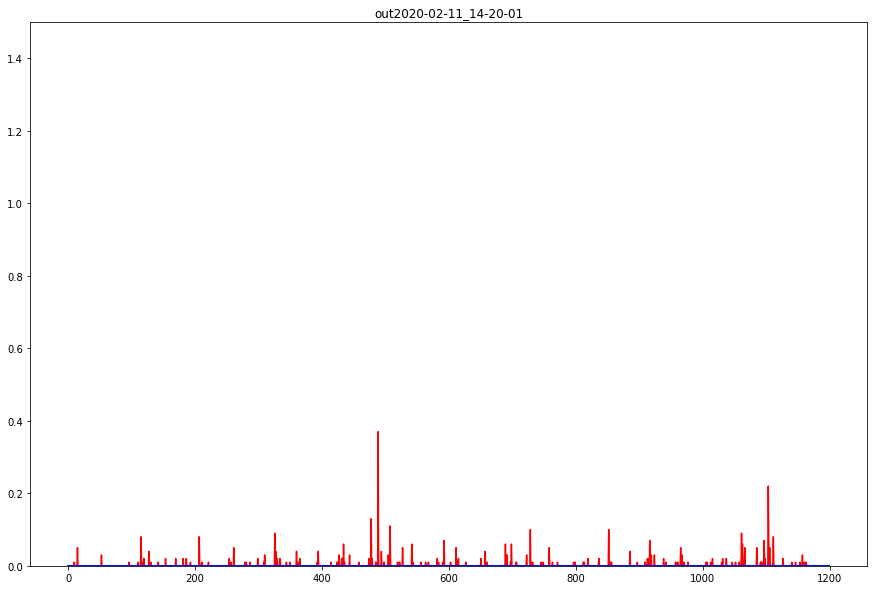

[[915  90]
 [ 16  40]]
out2020-02-04_14-02-51 [1.0, 0.9368613138686132, 0.9000942507068803]


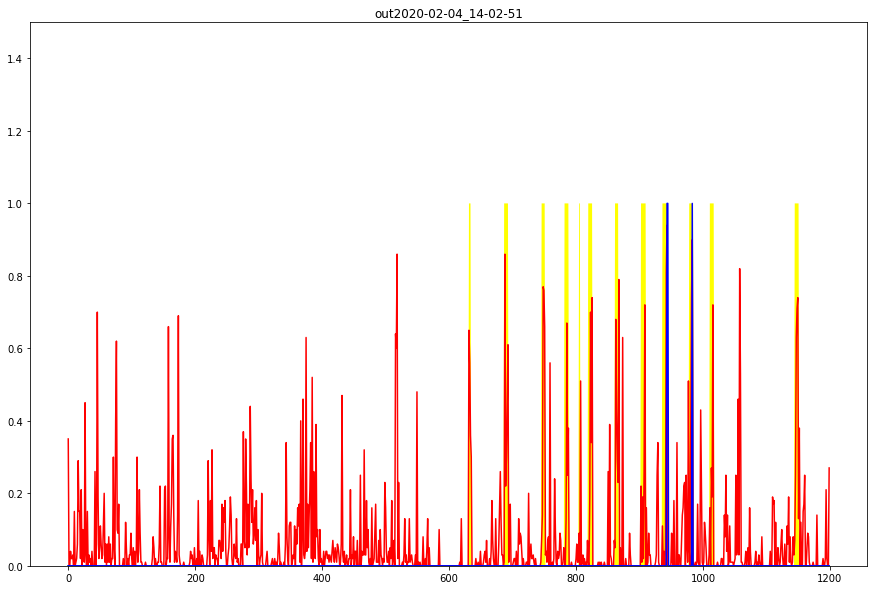

[[982   0]
 [ 11   0]]
out2020-02-03_13-03-20 [1.0, 0.9297101449275362, 0.9889224572004028]


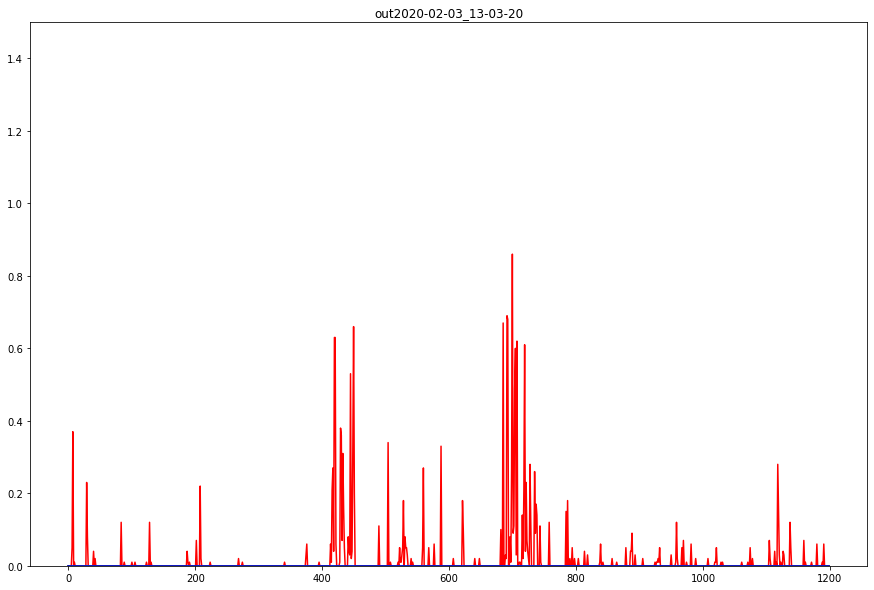

[[115   0]
 [  2   0]]
out2020-02-14_13-13-49 [1.0, 0.9342988343341575, 0.9829059829059829]


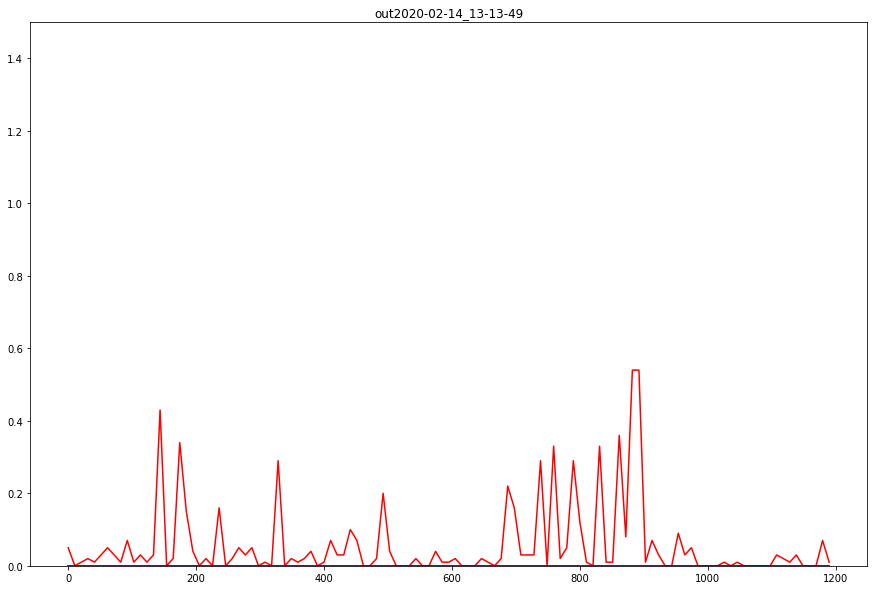

[[992   0]
 [  5   0]]
out2020-02-05_14-02-29 [1.0, 0.9297989031078611, 0.9949849548645938]


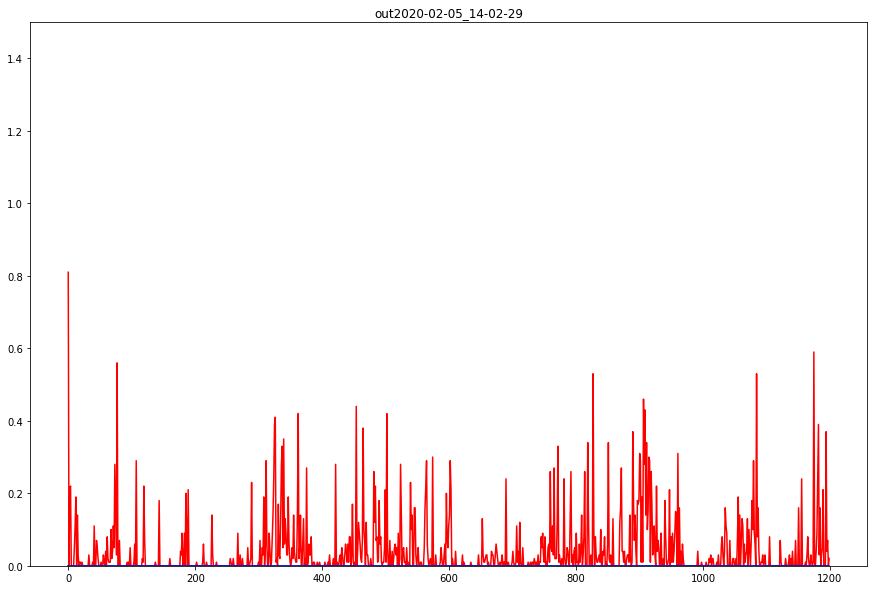

[[1461    0]
 [   4    0]]
out2020-02-06_14-39-28 [1.0, 0.9306379821958457, 0.9972696245733789]


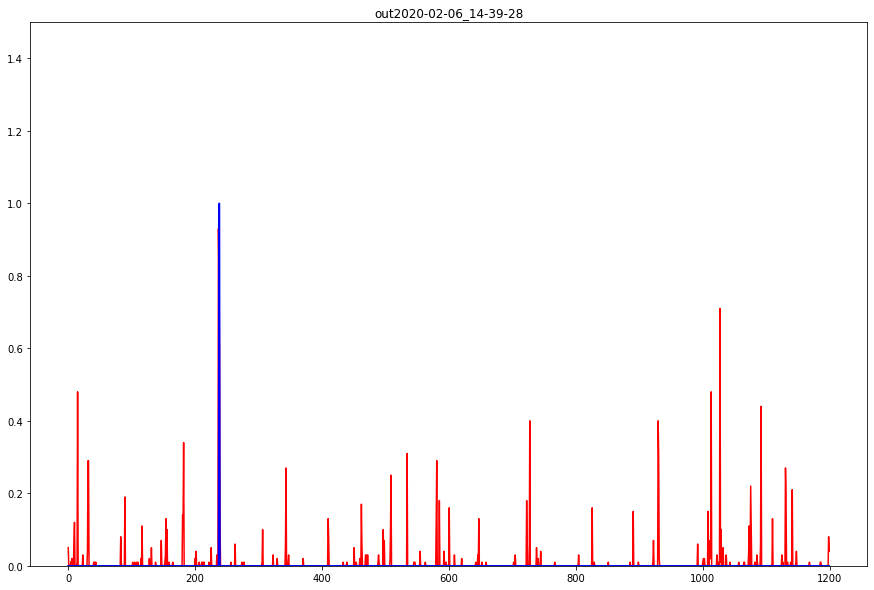

[[986  24]
 [  0   0]]
out2020-02-05_15-40-50 [1.0, 0.9258181818181819, 0.9762376237623762]


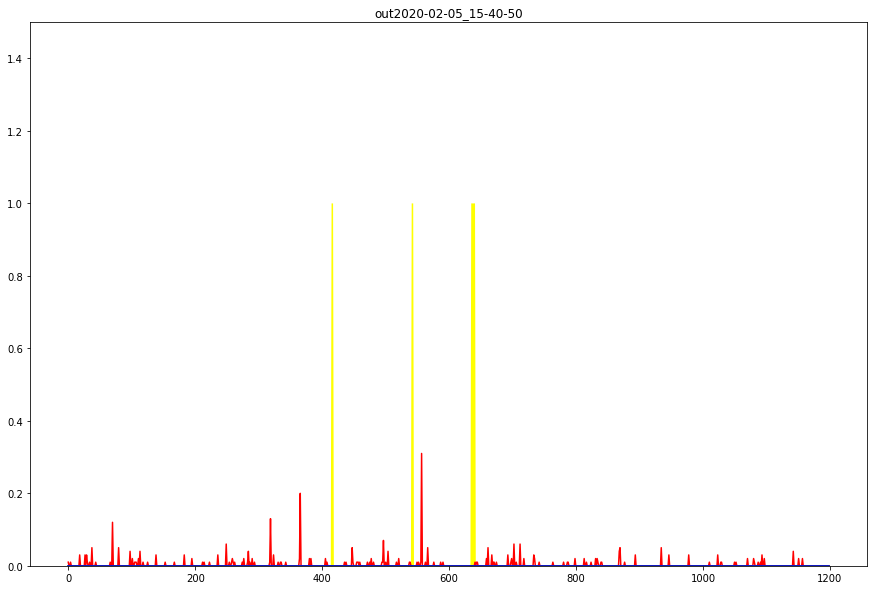

[[166  36]
 [  1   4]]
out2020-02-10_08-57-44 [1.0, 0.9357700496806246, 0.821256038647343]


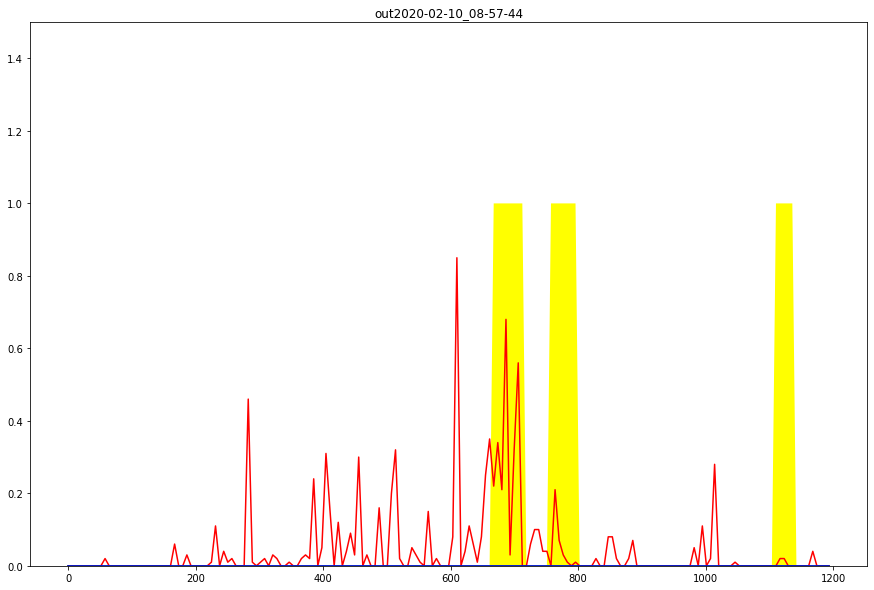

[[1769   20]
 [   9    2]]
out2020-01-30_15-26-58 [1.0, 0.9281168101834519, 0.9838888888888889]


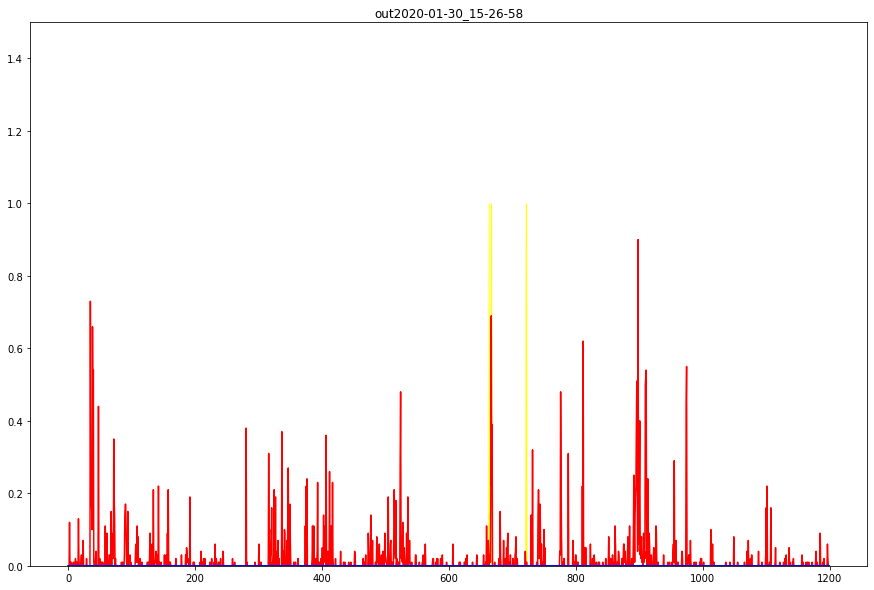

[[985   6]
 [  9   0]]
out2020-02-05_13-40-33 [1.0, 0.9272197962154294, 0.985]


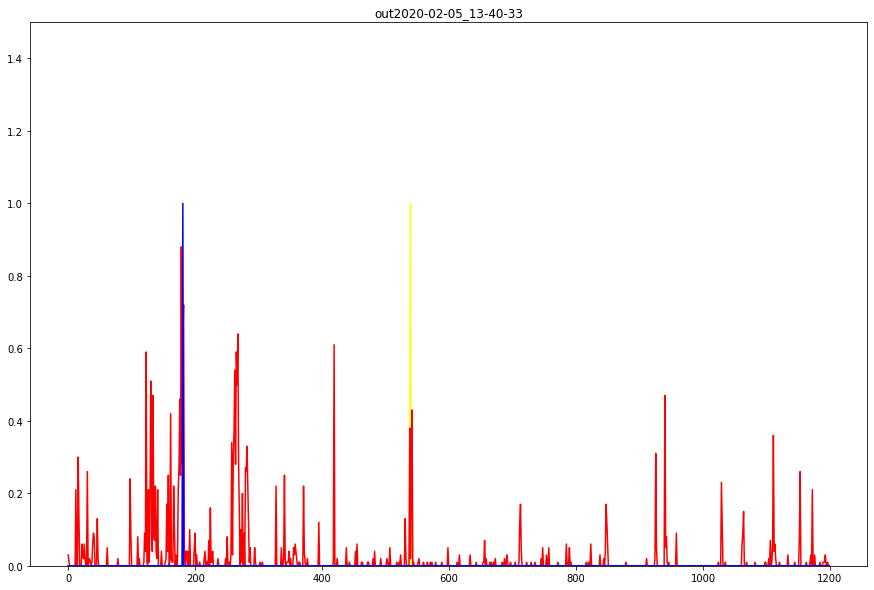

[[918 104]
 [ 14  24]]
out2020-02-04_14-30-50 [1.0, 0.9379788398394746, 0.8886792452830189]


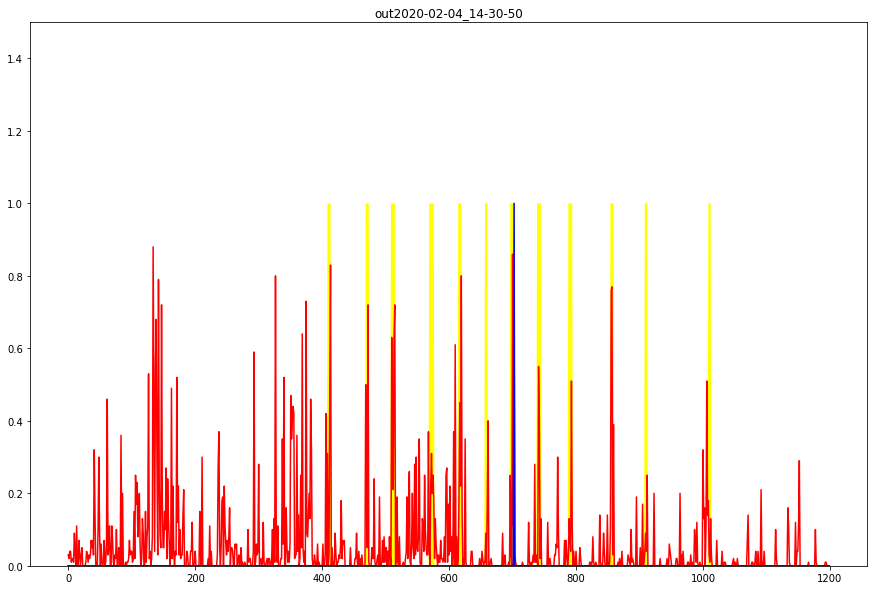

[[885 142]
 [ 12  56]]
out2020-02-05_16-13-57 [1.0, 0.9336734693877551, 0.8593607305936073]


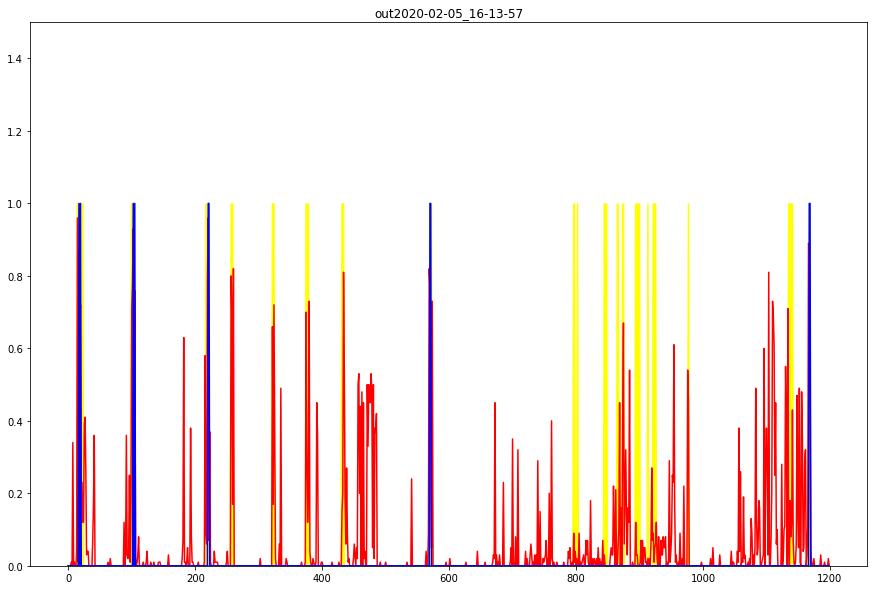

[[992   0]
 [  5   0]]
out2020-02-05_15-16-07 [1.0, 0.9361546880700474, 0.9949849548645938]


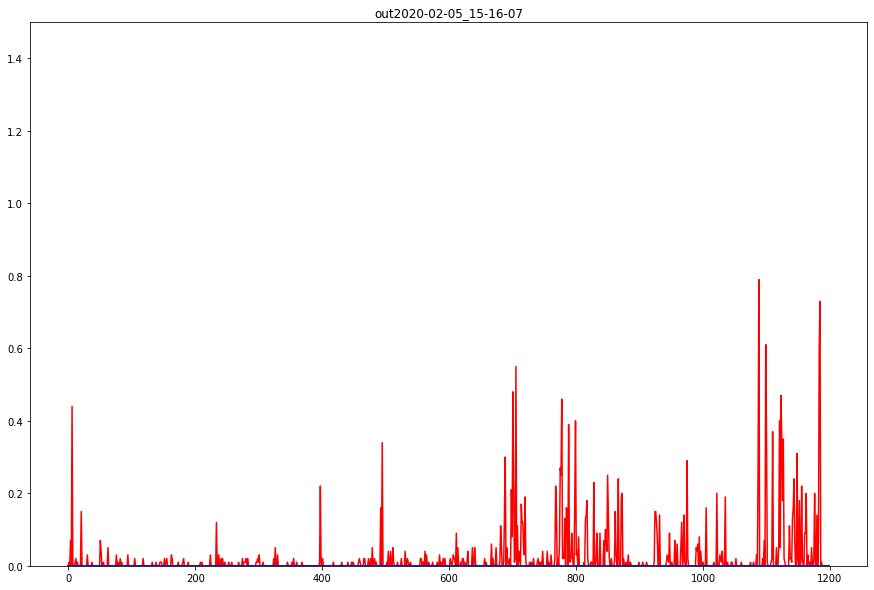

[[954  36]
 [  8  34]]
out2020-02-05_16-36-55 [1.0, 0.9272462713714078, 0.9573643410852714]


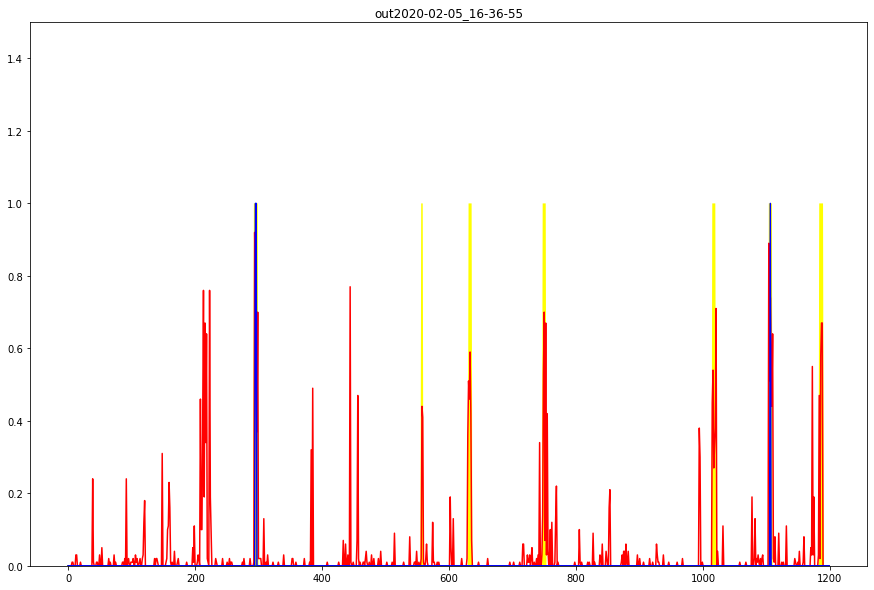

[[1692    0]
 [  94    0]]
out2020-01-30_16-18-34 [1.0, 0.9303892215568862, 0.9473684210526315]


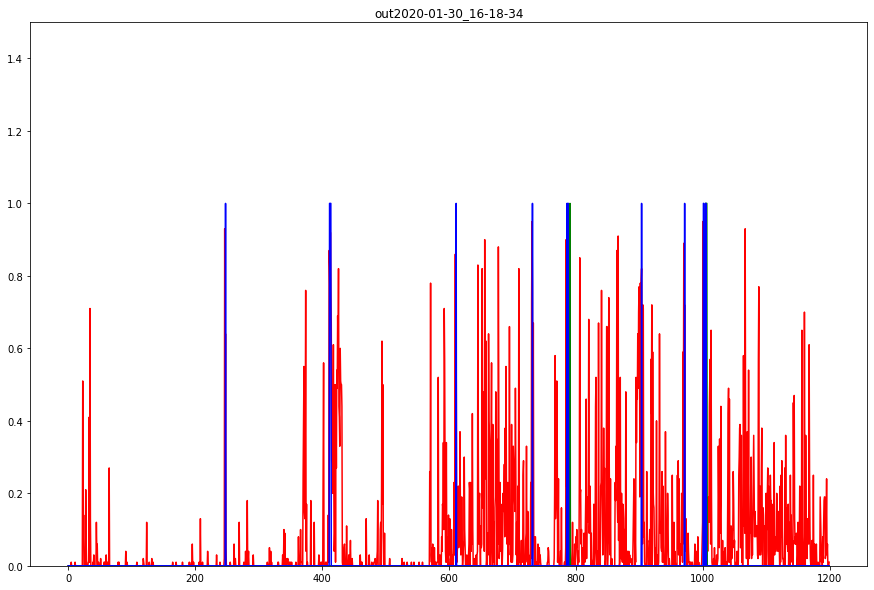

[[745   0]
 [  3   0]]
out2020-02-04_13-04-19 [1.0, 0.9354604786076868, 0.9959893048128342]


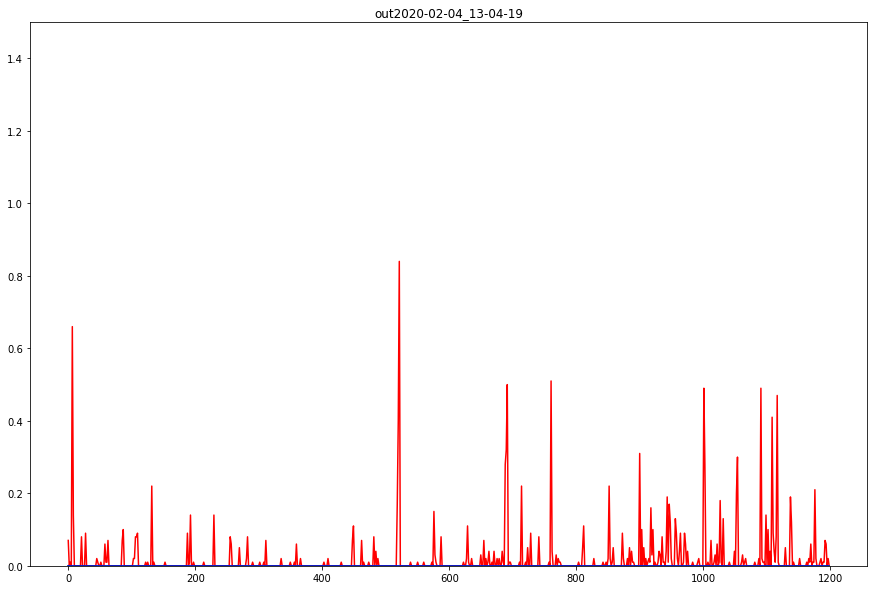

[[283 574]
 [ 53 104]]
out2020-02-07_15-14-00 [1.0, 0.9451905626134302, 0.3816568047337278]


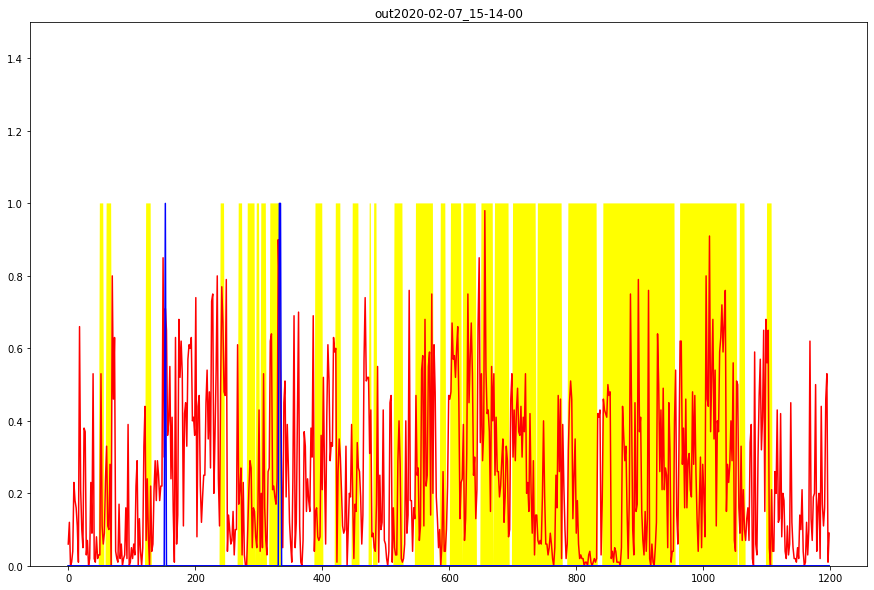

[[992   0]
 [  4   0]]
out2020-02-03_14-45-36 [1.0, 0.9314472252448314, 0.9959839357429718]


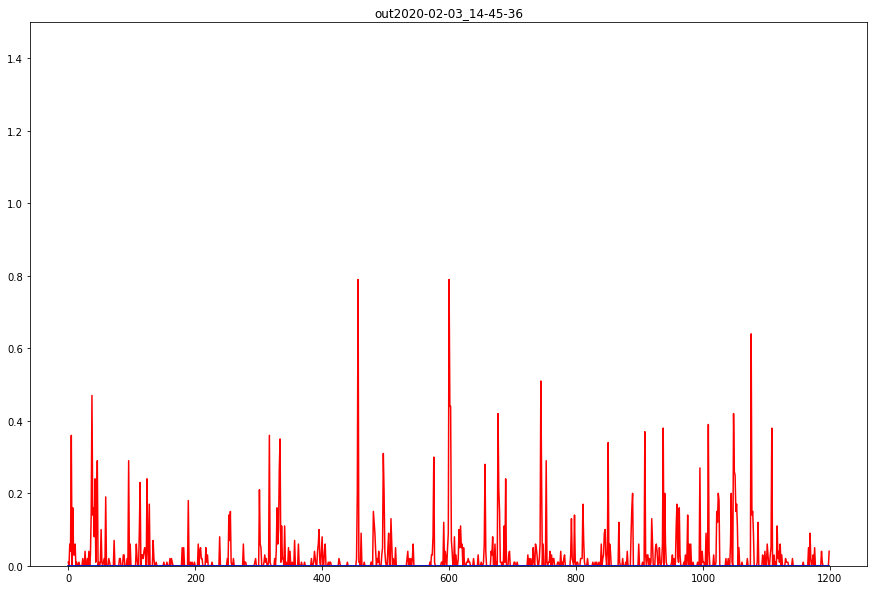

[[1299    0]
 [  21    0]]
out2020-02-06_15-11-15 [1.0, 0.9316838995568686, 0.9840909090909091]


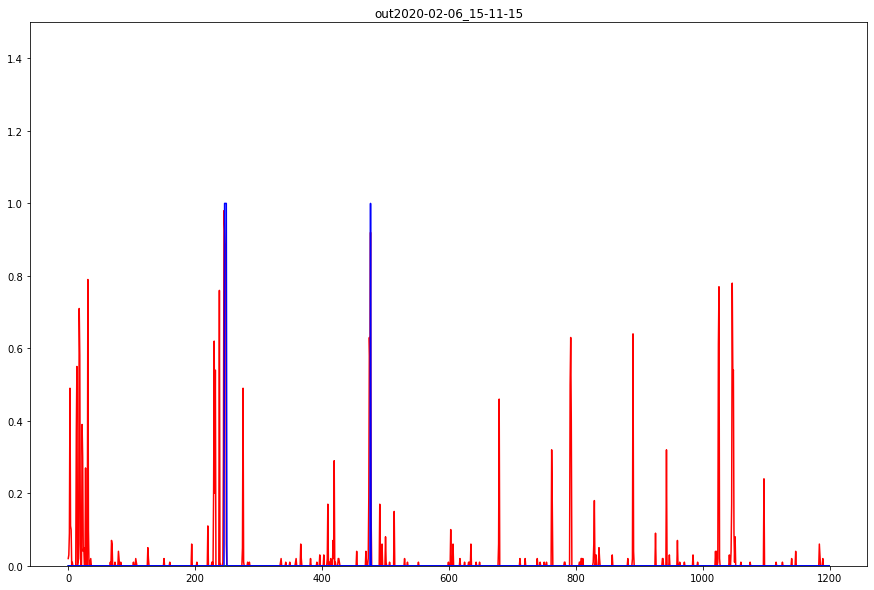

[[801   0]
 [  4   0]]
out2020-02-04_13-26-16 [1.0, 0.9385007278020379, 0.9950310559006211]


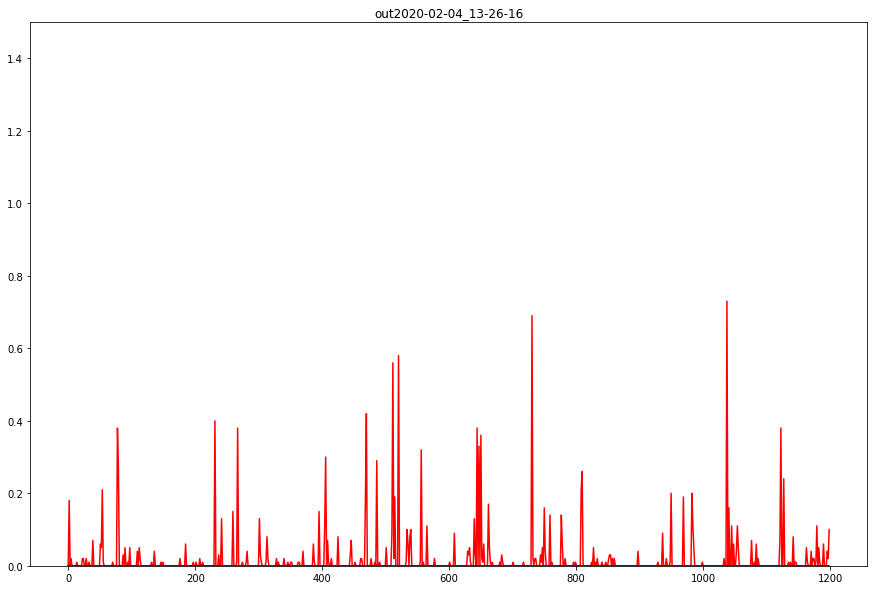

[[986   0]
 [ 11   0]]
out2020-02-03_14-23-37 [1.0, 0.9362870743317466, 0.9889669007021064]


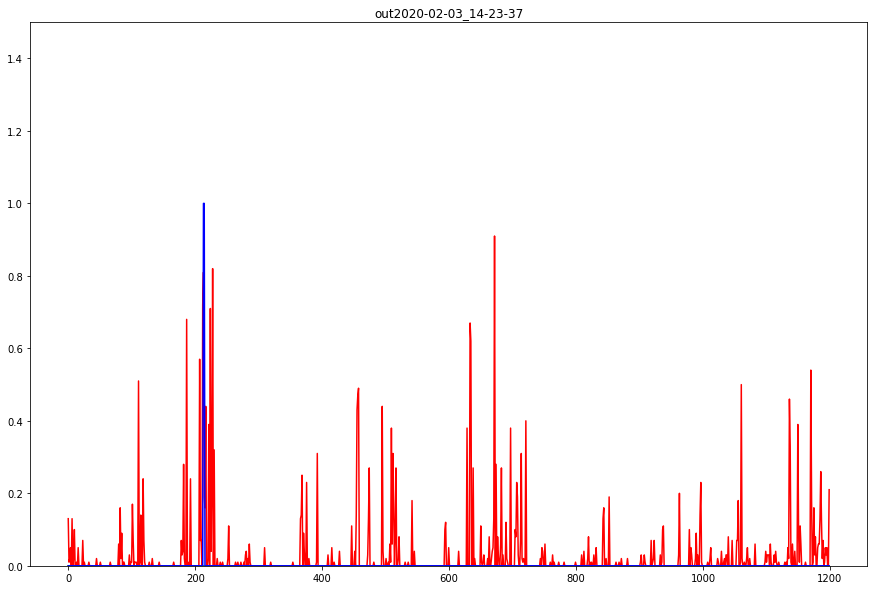

[[379 118]
 [218 140]]
out2020-02-07_14-52-17 [1.0, 0.9499274310595065, 0.6070175438596491]


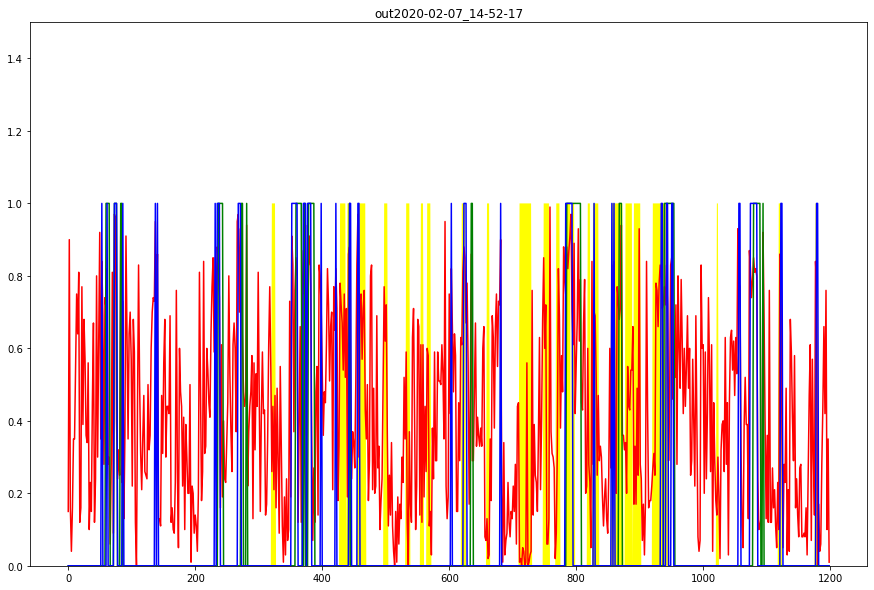

[[1615  322]
 [   4   12]]
out2020-01-30_15-49-43 [1.0, 0.9369573423933559, 0.8330773169482847]


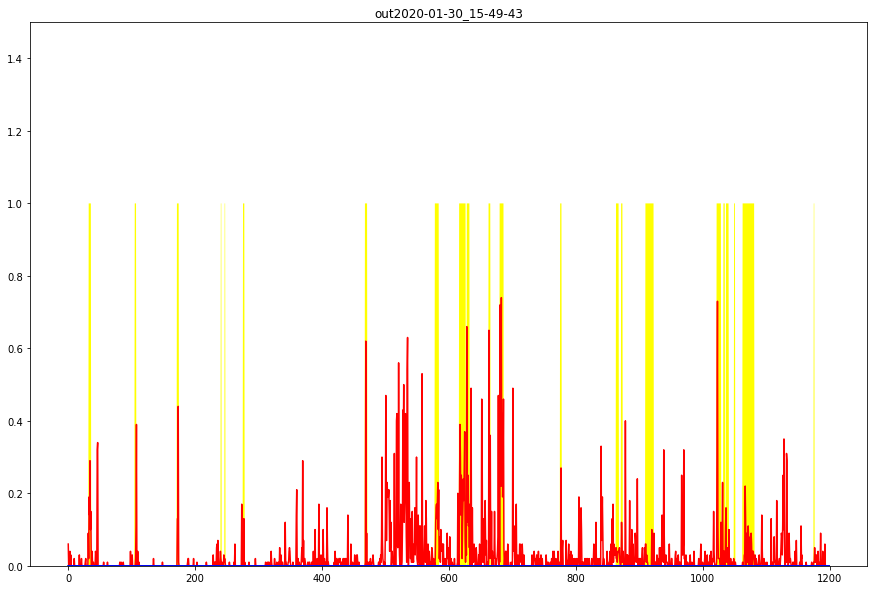

[[835 286]
 [  2  34]]
out2020-01-31_08-34-15 [1.0, 0.9374084919472914, 0.7510803802938635]


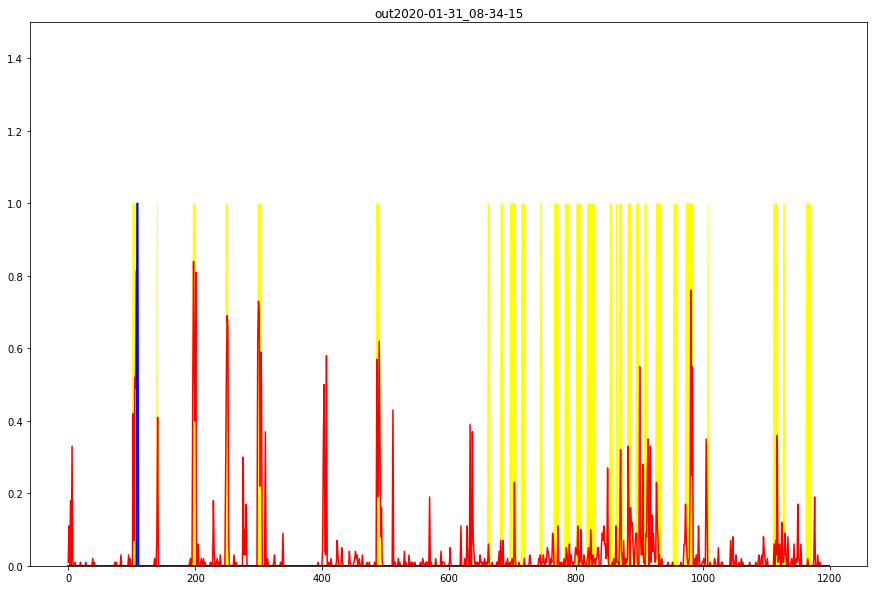

[[996   0]
 [  1   0]]
out2020-02-03_13-29-58 [1.0, 0.9251085383502171, 0.9989969909729187]


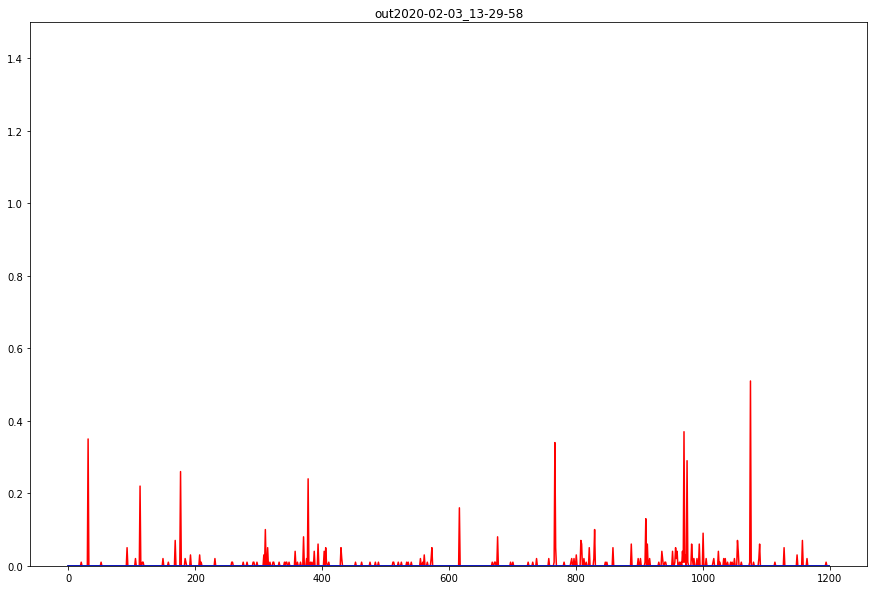

[[1366    0]
 [   1    0]]
out2020-02-11_14-42-33 [1.0, 0.9310980103168754, 0.9992684711046086]


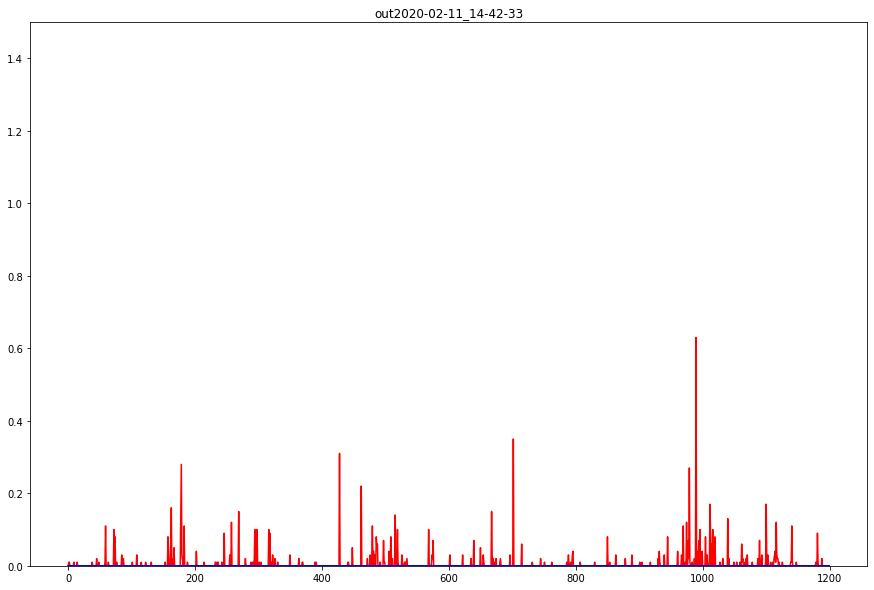

N= 26
0.9157491203304411 1.0 0.9334824926849341


In [57]:
from sklearn.linear_model import LogisticRegression
runtest(LogisticRegression)  
#runtest(RandomForestClassifier)  

## 儲存Model

In [26]:
#for i in result_matrix:
#    print(i)

In [27]:
#Path('clf_weights_20200911.bin').write_bytes(clf.coef_.tobytes()+clf.intercept_.tobytes())
#print(clf.coef_)
#print(clf.intercept_)